# 비선형SVM 커널트릭

## 비선형 데이터의 변환
- 비선형 데이터의 특성을 다항식 형태로 변환한다는 것은 더 상위의 차원으로 사상(mapping, projection)시킨다는 의미이다
- 이를 통해, 비선형 데이터를 선형의 결정 경계 상에서 구분할 수 있게 된다
![](../img/SVM_nonlinear_transform.png)

## 비선형 데이터에 대한 특성 확장의 문제
- 비선형 데이터의 특성을 다항식 형태로 명시적으로 변환하여 선형 분류를 수행하는 것은 절차가 명확하고 특정 기법에 종속되지 않는다는 장점
- 그러나 다항식의 차수에 따라 모형의 성능 상의 문제 또는 계산량 증가의 문제가 발생
    - 차수가 낮은 경우, 복잡한 유형의 데이터를 잘 표현하지 못 한다
    - 차수가 높은 경우, 특성이 많아지므로 분석 수행에 많은 시간이 소요

## 커널 트릭 (Kernel Trick)
- 일련의 계산을 통해서 실제로는 데이터의 특성을 확장하지 않으면서 특성을 확장한 것과 동일한 효과를 가져오는 기법
- 즉, 비선형 데이터를 상위 차원으로 사상시키는 연산에서 적용되는 함수 또는 방법을 통칭
- 커널 트릭(함수)을 적용하여 클래스들 간의 비선형 결정경계를 유도할 수 있게 된다
- 사이킷런 svm 모듈 내의 SVC에는 이러한 커널 트릭들이 이미 구현되어 있다
- 실제로는 데이터의 특성을 확장하지 않으면서 특성을 확장한 것과 동일한 효과를 가져오는 수학적 계산 기법이다. 비선형 데이터를 상위 차원으로 사상시키는 연산이 적용되는 함수 또는 방법을 뜻

## 다항식 커널 (Polynomial Kernel)
- 데이터가 가지고 있는 원래 특성들 간의 가능한 조합을 특정 차수(degree)까지 모두 계산하는 방식
- SVC를 이용하여 객체를 생성할 때 kernel에 ‘poly’를 적용한다
    - 매개변수 kernel은 커널 트릭의 이름이다. 다항식 커널 적용을 위해서 ‘poly’를 사용
    - 매개변수 degree는 다항식 커널에서만 사용되는 최대 차수이며, 기본값은 3
    - 매개변수 coef0은 다항식 커널과 시그모이드 커널에서만 사용되는 상수값이며, 기본값은 0
    - 매개변수 gamma는 커널 반경의 민감도를 결정하는 값이다. 기본 설정은 ‘auto’로서 1÷(특성 수)로 계산

### SVC를 이용하여 객체를 생성할 때 kernel에 ‘poly’를 적용

In [2]:
import sklearn.datasets as d
from sklearn import svm

X, y = d.make_moons(n_samples=100, noise=0.15, random_state=42)

svm_clf = svm.SVC(C=10,
                  kernel='poly',
                  degree=3, # 이건 사실 기본값
                  coef0=1,
                  gamma='auto' # 이건 사실 기본값
                 )

clf = svm_clf.fit(X,y)

### 3차 다항식 커널을 적용한 비선형 SVM 분류의 결과
![](../img/SVM_nonlinear_transform_result.png)

### 다항식 커널에서의 degree의 영향
- 최대 차수가 높을수록 복잡한 유형에 대한 분류 성능이 좋은 반면, 그만큼 과대적합의 가능성이 있음
- 최대 차수가 낮을수록 이와 반대의 결과가 도출
![](../img/SVM_nonlinear_transform_degree.png)

### 다항식 커널에서의 coef0의 영향
- 상수 coef0는 높은 차수에서의 계산 값의 영향이 지나치게 크게 적용되는 것을 조절하는 역할을 한다.
- 계산 결과 값에 대한 일종의 스케일링을 한 것과 유사
![](../img/SVM_nonlinear_transform_coef0.png)

### 다항식 커널에서의 gamma의 영향 → 이게 중요★★★
- 곡선의 곡률과 관계, 얼마나 더 휘냐
- gamma가 커질수록 결정 경계가 데이터 분포에 더욱 민감해지고, gamma가 작을수록 반경이 커지면서 결정 경계가 부드러운 형태를 띈다
- 매우 민감하게 변화해도 결과에 많은 영향을 줌
![](../img/SVM_nonlinear_transform_gamma.png)

## RBF 커널 (RBF Kernel)
- 데이터의 특성을 무한한 모든 차수의 모든 다항식으로 확장하는 방사형 기저 함수(RBF; radical basis function) 방식
- SVC를 이용하여 객체를 생성할 때 kernel을 ‘rbf’로 적용한다
    - 매개변수 kernel은 커널 트릭의 이름이다. RBF 커널을 적용하기 위해서 ‘rbf’를 사용
    - 매개변수 gamma는 커널 반경의 민감도를 결정하는 값이다. 기본 설정은 ‘auto’로서, 1÷(특성 수)로 계산

### SVC를 이용하여 객체를 생성할 때 kernel을 ‘rbf’로 적용한다
```python
svm_clf = svm.SVC(C=10,
                  kernel='rbf',
                  gamma='auto')
```

### RBF 커널을 적용한 비선형 SVM 분류의 결과
![](../img/SVM_nonliear_rbf_result.png)

### RBF 커널에서의 gamma의 영향
- gamma가 커질수록 결정 경계의 곡률이 커지는 것이므로 과대적합이 되며, gamma가 작을수록 곡률이 작아지므로 과소적합이 된다
![](../img/SVM_nonliear_rbf_gamma.png)

## 주요 커널 트릭에 대한 요약
![](../img/SVM_kernel_trick.png)

## 규제 수준의 조절을 위한 C와 gamma 값의 설정
- 매개변수 **`C`**는 **`얼마나 여유를 가지고 오류를 허용할 것인지`** 결정한다.
    - C 값이 높으면 마진이 좁아지고 오분류가 적어지며 과대적합이 될 수 있다.
    - C 값이 낮으면 마진이 넓어지고 오분류가 많아지며 과소적합이 될 수 있다.
- 매개변수 **`gamma`**는 **`결정 경계를 얼마나 데이터에 민감하게 반응시킬 것인지`** 결정한다.
    - gamma 값이 높으면 한 데이터에 영향을 크게 받으며 과대적합이 될 수 있다.
    - gamma 값이 낮으면 한 데이터에 영향을 적게 받으며 과소적합이 될 수 있다.
    
- 매개변수 C와 gamma의 값은 분류 모형의 성능과 밀접한 연관이 있다.
    - 이들의 값이 클수록, 모형의 복잡도가 증가한다.
    - 이들의 값이 작을수록, 모형의 복잡도가 감소한다.
- 따라서 학습을 수행할 때 GridSearchCV 등을 이용하여 모형의 성능을 극대화하는 C와 gamma의 최적값을 찾아낼 필요가 있다
- C와 gamma 값의 변화에 따른 모형의 변동 예
![](../img/SVM_C_gamma.png)

## 서포트 벡터 머신

> **서포트 벡터 머신(SVM) = 서포트 벡터 분류기(SVC) + 커널 기법**

- 궁극적인 의미에서의 서포트 벡터 머신이란, 서포트 벡터 분류기(support vector classifier)와 커널 기법을 결합하여 분류를 수행하는 분류기를 의미
![](../img/SVM_SVC+kernel.png)

## 예제 - IRIS 데이터
- IRIS 데이터의 꽃잎의 길이와 너비를 특성으로 하여, RBF 커널을 적용한 비선형 분류를 수행
- 검증 정확도, 오차 행렬 또는 보고서 형태의 지표 출력
- 그래프 시각화를 결과로 도출 (결정경계 표시)

In [97]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC

### 데이터 준비

In [256]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = iris.target

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 0)

### RBF 커널을 적용한 비선형 분류를 수행

In [255]:
c = 1
g = 0.5
d = 3
kernel_type = 'rbf'

In [258]:
svm_clf = SVC(C = c, # 1이 default
              kernel=kernel_type,
              degree=d,
              gamma=g #0.5가 'auto'
             )

In [259]:
clf = svm_clf.fit(X_train,y_train)
clf

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [260]:
y_pred = clf.predict(X_test)

### 검증 정확도

In [261]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [262]:
clf.score(X_test,y_test)

0.9777777777777777

### 오차 행렬

In [263]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

### 보고서

In [264]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 그래프 시각화

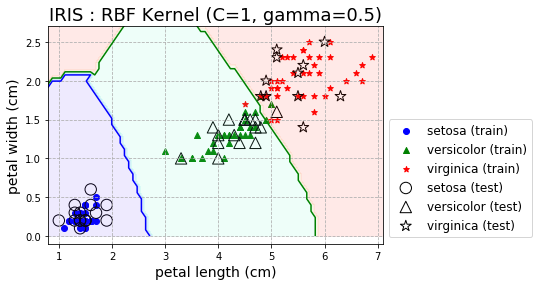

In [265]:
c_set = ['blue','green','red']
m_set = ['o','^','*']
l_set = iris.target_names

# 훈련 데이터 그리기
for t in set(y_train):
    x_pts = [X_train[i, 0] for i in range(len(y_train)) if y_train[i] == t]
    y_pts = [X_train[i, 1] for i in range(len(y_train)) if y_train[i] == t]
    plt.scatter(x_pts,
                y_pts,
                color=c_set[t],
                marker=m_set[t],
                label=l_set[t]+" (train)",
                #                 alpha=0.3
                )

# 검증 데이터 그리기
for t in set(y_test):
    x_pts = [X_test[i, 0] for i in range(len(y_test)) if y_test[i] == t]
    y_pts = [X_test[i, 1] for i in range(len(y_test)) if y_test[i] == t]
    plt.scatter(x_pts,
                y_pts,
                marker=m_set[t],
                label=l_set[t]+" (test)",
                #                 alpha=0.3,
                s=130,
                edgecolors='black',
                facecolor='none')

x1s = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2s = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
X1, X2 = np.meshgrid(x1s, x2s)
XX = np.vstack([X1.ravel(), X2.ravel()]).transpose()
YY = clf.predict(XX)
yy = YY.reshape(X1.shape)

plt.contour(x1s, x2s, yy, levels=[0,1,2], colors=c_set) # plt.contour(x1s, x2s, yy, colors="black")
plt.contourf(x1s, x2s, yy, cmap=plt.cm.rainbow, alpha=0.1)
plt.grid(linestyle="--")
plt.xlabel(iris.feature_names[2], fontsize=14)
plt.ylabel(iris.feature_names[3], fontsize=14)
plt.legend(fontsize=12, bbox_to_anchor=(1, 0.6))
plt.title('IRIS : {} Kernel (C={}, gamma={})'.format(kernel_type.upper(),c, g), fontsize=18)
# plt.xlim(0,7)
# plt.ylim(0,3)
plt.axis((X[:, 0].min()-0.2, X[:, 0].max()+0.2,
          X[:, 1].min()-0.2, X[:, 1].max()+0.2))
plt.show()